In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [117]:
class LinearRegression():
    allowed_regularization = ["ridge","lasso","none"]
    allowed_penalize = ["normal"]
    allowed_verbose = ["true","false"]
    def __init__(self,epochs = 1000,regularization = "none",penalize="normal",learning_rate = 0.01,verbose = "false",reg_hyperparameter = 0.1):
        regularization = regularization.lower()
        penalize = penalize.lower()
        verbose = verbose.lower()
        if type(epochs) != int:
            raise ValueError(f"the given epochs = {epochs} must be an int")
        if regularization not in self.allowed_regularization:
            raise ValueError(f"allowed parameters for regularization are {self.allowed_regularization}")
        if penalize not in self.allowed_penalize:
            raise ValueError(f"allowed parameters for penalize are {self.allowed_penalize}")
        if verbose not in self.allowed_verbose:
            raise ValueError(f"allowed parameters for verbose are {self.allowed_verbose}")
        
        
        self.epochs = epochs
        self.regularization = regularization
        self.penalize = penalize
        self.learning_rate = learning_rate
        self.verbose= verbose
        self.regularization_hyperparam = 0 if self.regularization == "none" else reg_hyperparameter
        if self.regularization_hyperparam !=0:
            self.reg_power =  1 if self.regularization == "lasso" else 2
        else:
            self.reg_power = 0
            self.w = None
            self.b = None

    def costFunction(self,w,b,x,y):
        x=x.T
        y=y.T
        cost = 0
        if self.penalize == "normal":
            cost+= np.sum((w@x+b-y)**2)/(2*len(x.T))
        elif self.penalize == "heavy":
            loss = w@x+b-y
            cost += np.sum((loss)**4/(2*len(x.T)))
        cost += (self.regularization_hyperparam* (np.linalg.norm(w))**self.reg_power)/(2*len(x.T))
        
        return cost
    
    def gradient(self,w,b,x,y):
        x=x.T
        y=y.T
        gradW = np.zeros((w.shape))
        gradB = 0
        z = w@x + b
        if self.penalize == "normal":
            gradW += (z-y)@(x.T)
            gradB += np.sum(z-y)
        elif self.penalize == "heavy":
            gradW += (2*(z-y)**3)@(x.T)
            gradB += np.sum(2*(z-y)**3)
        
        if self.regularization == "ridge":
            gradW += w
        elif self.regularization == "lasso":
            gradW += np.sign(w)
        
        gradW/=len(x.T)
        gradB/= len(x.T)
        return gradW, gradB
    
    def descend(self,w,b,x,y):
        gradW,gradB = self.gradient(w,b,x,y)
        w = w- self.learning_rate*gradW
        b =b- self.learning_rate*gradB
        return w,b
    
    def fit(self,x,y):
        w = np.random.randn(1,x.shape[1])* 0.001
        b = 0
        costs = []
        if isinstance(x,pd.DataFrame):
            x = x.values
        if (isinstance(y,pd.DataFrame)) or (isinstance(y,pd.Series)):
            y = y.values
        for epoch in range(self.epochs):
            cost = self.costFunction(w,b,x,y)
            if (len(costs)) and cost- costs[len(costs)-1] > 100:
                raise ValueError("model is diverging please try a different learning rate")
            w,b = self.descend(w,b,x,y)
            if self.verbose == "true":  
                print(f"Epoch number -- {epoch} -- cost is {cost}")
            costs.append(cost)   
        if self.verbose == "true":
            plt.plot(np.arange(self.epochs),costs)
        self.w = w
        self.b = b
        #print("w is ", self.w)
    
    def predict(self,X_test):
        if isinstance(X_test,pd.DataFrame):
            X_test = X_test.values
        y_pred = (self.w)@(X_test.T)+self.b
        return y_pred.T

        

In [118]:
from sklearn.datasets import load_diabetes
load_data = load_diabetes()

data = pd.DataFrame(load_data.data, columns=load_data.feature_names)
data['target'] = load_data.target

In [119]:
X = data.drop(columns = ["target"])
y = data["target"]


In [120]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [135]:
model = LinearRegression(epochs = 50000 ,regularization="none",verbose="True",reg_hyperparameter=0,learning_rate=1)

Epoch number -- 0 -- cost is 14835.184043037932
Epoch number -- 1 -- cost is 3006.0565996055634
Epoch number -- 2 -- cost is 2985.6383556665355
Epoch number -- 3 -- cost is 2965.556646092047
Epoch number -- 4 -- cost is 2945.805461109728
Epoch number -- 5 -- cost is 2926.378901628576
Epoch number -- 6 -- cost is 2907.271176356547
Epoch number -- 7 -- cost is 2888.4765998169905
Epoch number -- 8 -- cost is 2869.9895904016516
Epoch number -- 9 -- cost is 2851.804668459581
Epoch number -- 10 -- cost is 2833.91645442128
Epoch number -- 11 -- cost is 2816.319666957439
Epoch number -- 12 -- cost is 2799.009121171624
Epoch number -- 13 -- cost is 2781.979726826283
Epoch number -- 14 -- cost is 2765.2264866014734
Epoch number -- 15 -- cost is 2748.7444943856835
Epoch number -- 16 -- cost is 2732.5289335981756
Epoch number -- 17 -- cost is 2716.575075542255
Epoch number -- 18 -- cost is 2700.8782777889005
Epoch number -- 19 -- cost is 2685.4339825902066
Epoch number -- 20 -- cost is 2670.237715

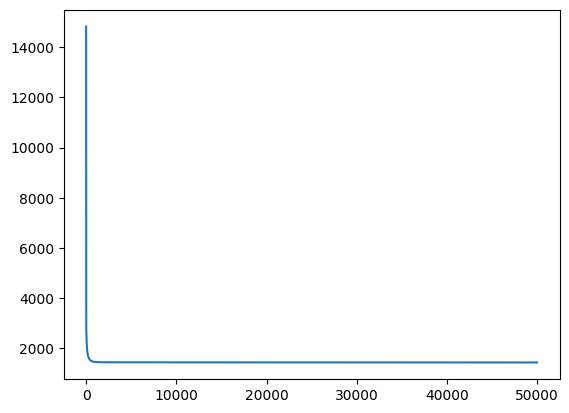

In [136]:
model.fit(X_train,y_train)

In [137]:
y_pred = model.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)


3019.8857852264487